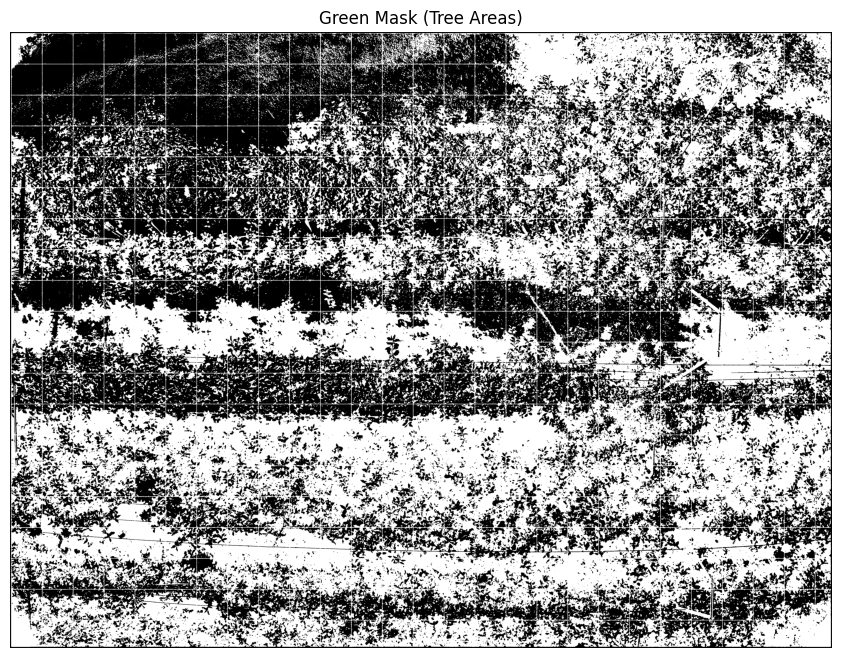

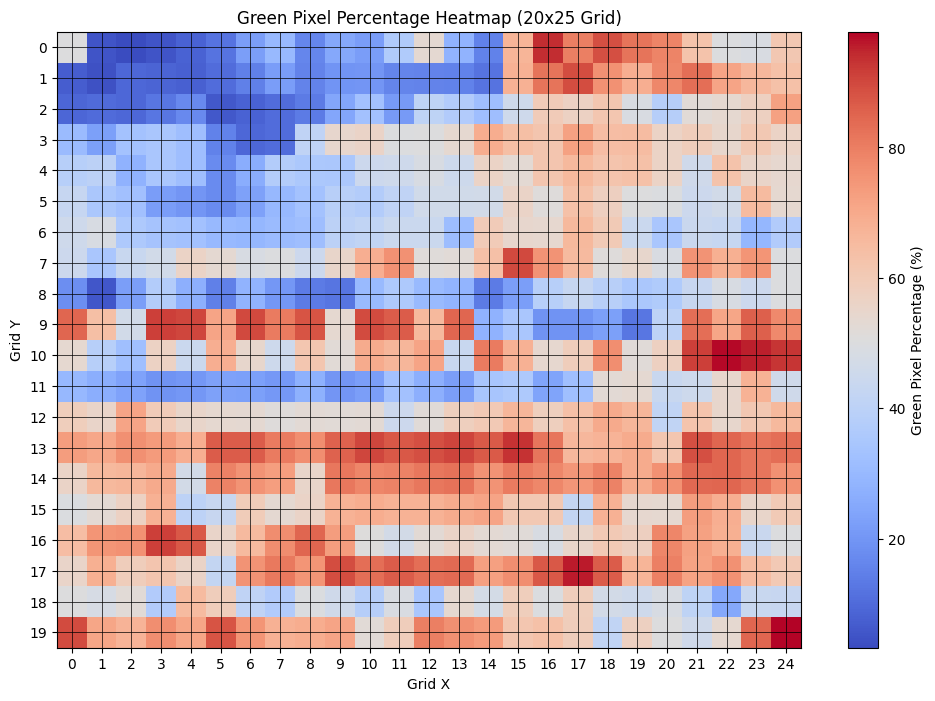

Green Pixel Percentages by Grid Coordinates:
Grid (0, 0): 50.37%
Grid (0, 1): 5.34%
Grid (0, 2): 3.28%
Grid (0, 3): 5.14%
Grid (0, 4): 8.44%
Grid (0, 5): 11.90%
Grid (0, 6): 22.44%
Grid (0, 7): 30.12%
Grid (0, 8): 16.51%
Grid (0, 9): 25.03%
Grid (0, 10): 21.85%
Grid (0, 11): 36.74%
Grid (0, 12): 53.38%
Grid (0, 13): 28.25%
Grid (0, 14): 15.15%
Grid (0, 15): 66.98%
Grid (0, 16): 93.79%
Grid (0, 17): 79.75%
Grid (0, 18): 88.69%
Grid (0, 19): 81.90%
Grid (0, 20): 78.87%
Grid (0, 21): 62.59%
Grid (0, 22): 49.95%
Grid (0, 23): 48.86%
Grid (0, 24): 60.94%
Grid (1, 0): 7.28%
Grid (1, 1): 4.71%
Grid (1, 2): 9.31%
Grid (1, 3): 8.72%
Grid (1, 4): 7.88%
Grid (1, 5): 10.34%
Grid (1, 6): 14.74%
Grid (1, 7): 21.88%
Grid (1, 8): 15.65%
Grid (1, 9): 19.75%
Grid (1, 10): 20.03%
Grid (1, 11): 15.85%
Grid (1, 12): 15.77%
Grid (1, 13): 15.36%
Grid (1, 14): 11.84%
Grid (1, 15): 67.95%
Grid (1, 16): 82.15%
Grid (1, 17): 89.15%
Grid (1, 18): 75.65%
Grid (1, 19): 68.89%
Grid (1, 20): 78.01%
Grid (1, 21): 83.1

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Directory path
directory_path = "/kaggle/input/treegrid1"

# Find the correct image file in the directory
image_file = None
for file_name in os.listdir(directory_path):
    if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_file = os.path.join(directory_path, file_name)
        break

if not image_file:
    print("No image file found in the directory. Please check the directory contents.")
    exit()

# Load the image
image = cv2.imread(image_file)

# Check if the image is loaded correctly
if image is None:
    print(f"Error loading image. Please check the file: {image_file}")
    exit()

# Extract the green channel
green_channel = image[:, :, 1]

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(green_channel, (5, 5), 0)

# Use Otsu's thresholding to segment trees based on the green channel
_, green_mask = cv2.threshold(
    blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)

# Divide into a 20x25 grid
height, width = green_mask.shape
num_rows = 20
num_cols = 25
grid_height = height // num_rows
grid_width = width // num_cols

# Initialize the percentage map
green_pixel_percentages = np.zeros((num_rows, num_cols))

# Calculate the percentage of green-highlighted pixels in each grid cell
for i in range(num_rows):
    for j in range(num_cols):
        # Define the grid boundaries
        row_start = i * grid_height
        row_end = row_start + grid_height
        col_start = j * grid_width
        col_end = col_start + grid_width
        
        # Extract the grid area
        grid_area = green_mask[row_start:row_end, col_start:col_end]
        tree_pixels = cv2.countNonZero(grid_area)
        total_pixels = grid_area.size
        
        # Calculate percentage of green-highlighted pixels
        green_pixel_percentages[i, j] = (tree_pixels / total_pixels * 100) if total_pixels > 0 else 0

# Display the green mask
plt.figure(figsize=(12, 8))
plt.imshow(green_mask, cmap="gray")
plt.title("Green Mask (Tree Areas)")
plt.axis("off")
plt.show()

# Display the percentage heatmap
plt.figure(figsize=(12, 8))
plt.imshow(green_pixel_percentages, cmap="coolwarm", interpolation="nearest", aspect='auto')
plt.colorbar(label="Green Pixel Percentage (%)")
plt.title("Green Pixel Percentage Heatmap (20x25 Grid)")
plt.xlabel("Grid X")
plt.ylabel("Grid Y")

# Label the grid coordinates
plt.xticks(ticks=np.arange(num_cols), labels=np.arange(num_cols))
plt.yticks(ticks=np.arange(num_rows), labels=np.arange(num_rows))
plt.grid(visible=True, color='black', linestyle='-', linewidth=0.5)
plt.show()

# Print the percentages and coordinates
print("Green Pixel Percentages by Grid Coordinates:")
for i in range(num_rows):
    for j in range(num_cols):
        print(f"Grid ({i}, {j}): {green_pixel_percentages[i, j]:.2f}%")


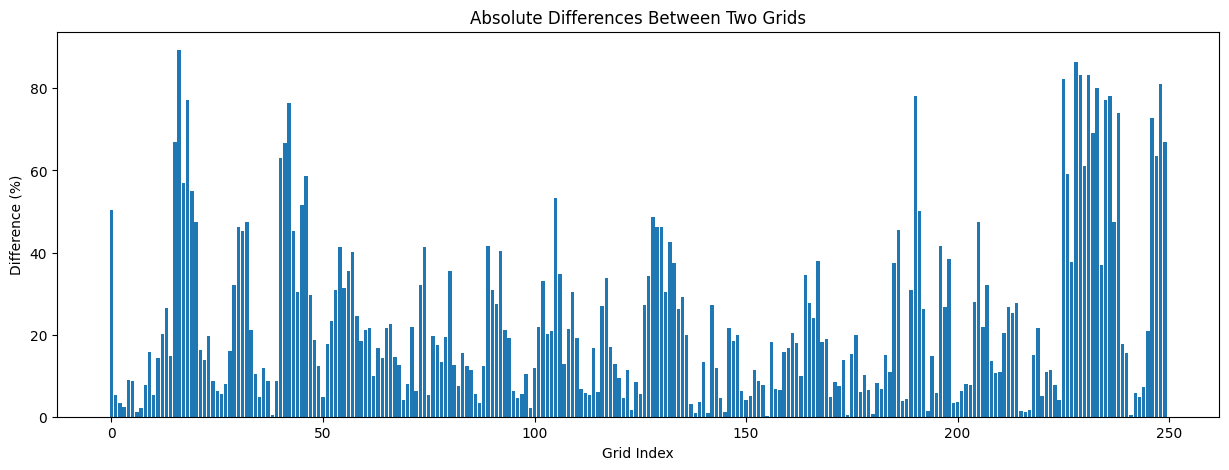

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Full dataset for grid1 (Dataset 1)
grid1 = np.array([
    50.37, 5.34, 3.28, 5.14, 8.44, 11.90, 22.44, 30.12, 16.51, 25.03, 21.85, 36.74, 53.38, 28.25, 15.15, 66.98, 93.79, 79.75, 88.69, 81.90, 78.87, 62.59, 49.95, 48.86, 60.94,
    7.28, 4.71, 9.31, 8.72, 7.88, 10.34, 14.74, 21.88, 15.65, 19.75, 20.03, 15.85, 15.77, 15.36, 11.84, 67.95, 82.15, 89.15, 75.65, 68.89, 78.01, 83.10, 71.24, 66.33, 63.22,
    9.16, 10.19, 9.25, 12.51, 17.09, 5.94, 8.28, 10.61, 13.76, 24.62, 33.00, 21.25, 40.62, 37.18, 31.75, 45.71, 59.59, 56.81, 61.39, 48.80, 38.26, 52.04, 53.57, 57.37, 72.28,
    30.87, 22.54, 33.19, 35.01, 31.77, 15.30, 9.47, 10.34, 41.20, 54.39, 55.77, 49.79, 50.16, 53.71, 69.15, 63.99, 61.70, 72.04, 64.33, 64.57, 56.16, 58.76, 54.89, 60.68, 56.23,
    38.68, 39.91, 27.96, 34.99, 31.70, 17.35, 26.34, 37.47, 35.64, 35.11, 44.74, 45.63, 48.33, 45.31, 56.29, 52.83, 61.82, 65.83, 62.32, 63.09, 56.40, 45.79, 62.39, 55.39, 53.98,
    42.77, 35.27, 32.71, 21.89, 20.08, 17.50, 22.97, 29.84, 33.38, 39.06, 37.29, 40.94, 46.38, 46.36, 46.66, 55.89, 50.88, 63.34, 57.75, 50.34, 49.52, 44.89, 46.64, 65.03, 53.54,
    45.56, 48.45, 36.01, 33.77, 33.02, 30.21, 29.33, 30.79, 31.78, 40.05, 41.64, 44.57, 44.41, 31.47, 59.61, 54.53, 54.20, 65.85, 59.93, 44.31, 34.80, 44.14, 42.92, 29.44, 36.93,
    44.94, 34.72, 43.86, 46.71, 56.11, 53.27, 48.53, 49.92, 44.64, 55.16, 68.61, 75.70, 51.46, 52.25, 63.71, 89.83, 75.46, 65.63, 50.94, 54.79, 48.71, 75.40, 68.40, 75.01, 50.09,
    18.09, 5.57, 22.44, 37.52, 27.05, 15.05, 28.03, 20.36, 13.81, 12.31, 30.29, 36.09, 30.38, 28.74, 13.88, 22.15, 38.60, 42.98, 38.99, 35.17, 36.78, 43.23, 48.54, 44.77, 49.84,
    84.49, 63.86, 46.77, 91.11, 90.02, 71.33, 89.85, 80.54, 87.92, 53.57, 89.51, 86.49, 65.76, 84.47, 27.77, 34.91, 19.26, 19.25, 22.55, 12.56, 40.43, 83.24, 71.15, 85.80, 77.72
])

# Full dataset for grid2 (Dataset 2)
grid2 = np.array([
    0.00, 0.00, 0.00, 7.45, 17.44, 20.72, 23.62, 27.98, 24.33, 40.69, 16.52, 22.36, 33.18, 1.80, 0.28, 0.02, 4.47, 22.72, 11.48, 26.96, 31.46, 46.32, 63.87, 68.41, 52.12,
    1.07, 10.26, 17.17, 24.80, 39.89, 56.54, 60.07, 69.26, 36.70, 30.17, 15.30, 27.69, 24.58, 15.78, 3.04, 4.98, 15.46, 12.81, 30.33, 38.52, 26.55, 24.50, 41.52, 47.64, 50.93,
    13.85, 27.86, 32.53, 43.40, 58.32, 37.25, 43.71, 50.63, 38.26, 43.05, 54.23, 42.79, 50.42, 20.40, 17.39, 23.98, 37.01, 42.32, 48.71, 52.97, 46.14, 30.14, 47.23, 25.29, 30.85,
    25.52, 42.26, 50.67, 48.30, 51.26, 50.91, 21.95, 17.91, 25.65, 42.09, 44.36, 55.30, 46.78, 41.44, 27.68, 33.10, 34.29, 31.73, 43.12, 45.31, 49.96, 54.21, 60.44, 50.20, 58.40,
    50.49, 61.85, 61.12, 55.16, 52.56, 70.52, 60.99, 50.33, 57.10, 65.54, 63.82, 52.50, 54.21, 50.57, 39.43, 46.82, 34.78, 32.00, 45.27, 50.18, 47.05, 50.26, 51.09, 53.65, 62.33,
    48.31, 62.40, 67.02, 70.56, 66.32, 63.77, 53.46, 72.29, 70.91, 65.39, 66.53, 60.94, 49.36, 47.34, 50.30, 42.54, 49.86, 36.09, 45.97, 45.66, 48.48, 66.48, 65.03, 45.09, 59.83,
    41.49, 43.37, 24.66, 25.17, 25.31, 30.13, 47.53, 37.48, 38.17, 24.17, 24.99, 24.20, 26.43, 21.66, 25.17, 26.90, 30.07, 28.03, 41.73, 25.41, 29.90, 35.67, 35.42, 43.16, 36.63,
    29.75, 54.63, 49.99, 56.93, 49.60, 53.99, 56.71, 56.61, 59.75, 44.24, 31.14, 30.30, 47.74, 48.03, 32.91, 11.75, 25.26, 39.44, 49.56, 39.96, 54.53, 33.84, 41.66, 36.51, 46.76,
    14.45, 11.72, 30.44, 45.28, 54.93, 62.47, 49.82, 52.47, 27.28, 23.04, 41.23, 56.58, 57.14, 54.05, 41.60, 20.79, 37.42, 44.51, 54.14, 56.90, 41.91, 32.44, 37.27, 52.41, 53.80,
    2.29, 4.63, 9.10, 4.70, 6.66, 10.33, 6.56, 11.54, 7.96, 16.70, 12.32, 8.25, 18.37, 10.45, 9.99, 19.50, 19.65, 25.14, 17.68, 19.81, 19.54, 10.44, 7.57, 4.83, 10.77
])

# Ensure both arrays are the same length
if len(grid1) != len(grid2):
    raise ValueError("Both grids must have the same number of elements for comparison.")

# Calculate absolute differences
differences = np.abs(grid1 - grid2)

# Visualize the differences
plt.figure(figsize=(15, 5))
plt.bar(range(len(differences)), differences)
plt.title("Absolute Differences Between Two Grids")
plt.xlabel("Grid Index")
plt.ylabel("Difference (%)")
plt.show()

# Highlight significant differences
threshold = 20.0
significant_differences = differences > threshold


        


In [15]:
# Define grid dimensions (10 rows x 25 columns assumed based on the data length)
grid_rows, grid_cols = 10, 25

# Reshape the differences array into a 2D grid
differences_grid = differences.reshape(grid_rows, grid_cols)

# Highlight less than 10% differences
threshold_low = 10.0
small_differences = differences_grid < threshold_low

# Print grid coordinates and values of small differences
print("Differences less than 10%:")
for row in range(grid_rows):
    for col in range(grid_cols):
        if small_differences[row, col]:
            print(f"Grid ({row}, {col}): Difference = {differences_grid[row, col]:.2f}%")


Differences less than 10%:
Grid (0, 1): Difference = 5.34%
Grid (0, 2): Difference = 3.28%
Grid (0, 3): Difference = 2.31%
Grid (0, 4): Difference = 9.00%
Grid (0, 5): Difference = 8.82%
Grid (0, 6): Difference = 1.18%
Grid (0, 7): Difference = 2.14%
Grid (0, 8): Difference = 7.82%
Grid (0, 10): Difference = 5.33%
Grid (0, 24): Difference = 8.82%
Grid (1, 0): Difference = 6.21%
Grid (1, 1): Difference = 5.55%
Grid (1, 2): Difference = 7.86%
Grid (1, 10): Difference = 4.73%
Grid (1, 12): Difference = 8.81%
Grid (1, 13): Difference = 0.42%
Grid (1, 14): Difference = 8.80%
Grid (2, 0): Difference = 4.69%
Grid (2, 12): Difference = 9.80%
Grid (2, 19): Difference = 4.17%
Grid (2, 20): Difference = 7.88%
Grid (2, 22): Difference = 6.34%
Grid (3, 0): Difference = 5.35%
Grid (3, 7): Difference = 7.57%
Grid (3, 11): Difference = 5.51%
Grid (3, 12): Difference = 3.38%
Grid (3, 20): Difference = 6.20%
Grid (3, 21): Difference = 4.55%
Grid (3, 22): Difference = 5.55%
Grid (3, 24): Difference = 2.1

In [ ]:
# there are 92 data points under 10%

In [16]:
# Define grid dimensions (10 rows x 25 columns assumed based on the data length)
grid_rows, grid_cols = 10, 25

# Reshape the differences array into a 2D grid
differences_grid = differences.reshape(grid_rows, grid_cols)

# Highlight less than 10% differences
threshold_low = 20.0
small_differences = differences_grid < threshold_low

# Print grid coordinates and values of small differences
print("Differences less than 20%:")
for row in range(grid_rows):
    for col in range(grid_cols):
        if small_differences[row, col]:
            print(f"Grid ({row}, {col}): Difference = {differences_grid[row, col]:.2f}%")

Differences less than 20%:
Grid (0, 1): Difference = 5.34%
Grid (0, 2): Difference = 3.28%
Grid (0, 3): Difference = 2.31%
Grid (0, 4): Difference = 9.00%
Grid (0, 5): Difference = 8.82%
Grid (0, 6): Difference = 1.18%
Grid (0, 7): Difference = 2.14%
Grid (0, 8): Difference = 7.82%
Grid (0, 9): Difference = 15.66%
Grid (0, 10): Difference = 5.33%
Grid (0, 11): Difference = 14.38%
Grid (0, 14): Difference = 14.87%
Grid (0, 21): Difference = 16.27%
Grid (0, 22): Difference = 13.92%
Grid (0, 23): Difference = 19.55%
Grid (0, 24): Difference = 8.82%
Grid (1, 0): Difference = 6.21%
Grid (1, 1): Difference = 5.55%
Grid (1, 2): Difference = 7.86%
Grid (1, 3): Difference = 16.08%
Grid (1, 9): Difference = 10.42%
Grid (1, 10): Difference = 4.73%
Grid (1, 11): Difference = 11.84%
Grid (1, 12): Difference = 8.81%
Grid (1, 13): Difference = 0.42%
Grid (1, 14): Difference = 8.80%
Grid (1, 23): Difference = 18.69%
Grid (1, 24): Difference = 12.29%
Grid (2, 0): Difference = 4.69%
Grid (2, 1): Differe

In [ ]:
# 181 grids

preprocessor_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/942 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


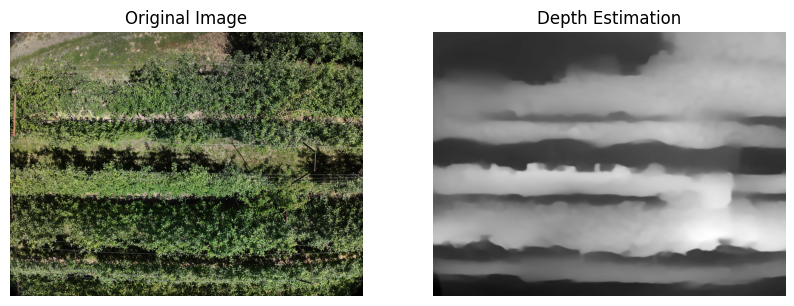

Depth estimation output saved to: /kaggle/working/depth_estimation_output.png


In [1]:
import torch
from transformers import DPTForDepthEstimation, DPTImageProcessor
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/kaggle/input/depthtest/img02-orginal.JPG"  # Update with the correct path to your image
image = Image.open(image_path).convert("RGB")

# Load the model and processor
processor = DPTImageProcessor.from_pretrained("Intel/dpt-large")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-large")

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth.squeeze().cpu().numpy()

# Normalize the depth map for visualization
depth_min = predicted_depth.min()
depth_max = predicted_depth.max()
normalized_depth = (predicted_depth - depth_min) / (depth_max - depth_min)

# Resize the normalized depth map to match the original image dimensions
original_size = image.size  # (width, height)
resized_depth = Image.fromarray((normalized_depth * 255).astype(np.uint8)).resize(original_size, Image.BILINEAR)
resized_depth = np.array(resized_depth) / 255.0  # Normalize back to [0, 1] after resizing

# Save the depth estimation output to a file
output_path = "/kaggle/working/depth_estimation_output.png"
resized_depth_image = Image.fromarray((resized_depth * 255).astype(np.uint8))  # Convert back to [0, 255]
resized_depth_image.save(output_path)

# Display the results
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Depth Estimation")
plt.imshow(resized_depth, cmap="gray")  # Use grayscale for visualization
plt.axis("off")
plt.show()

print(f"Depth estimation output saved to: {output_path}")



preprocessor_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/942 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


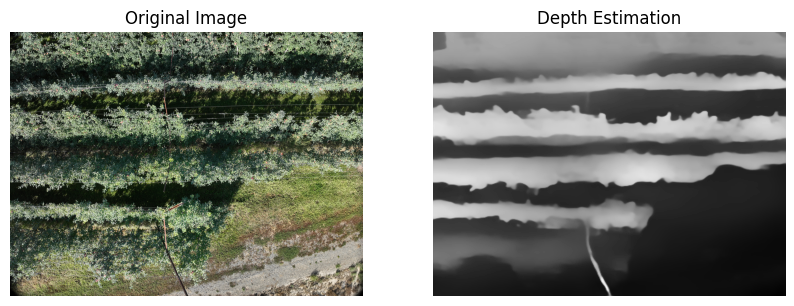

Depth estimation output saved to: /kaggle/working/depth_estimation_output2.png


In [1]:
import torch
from transformers import DPTForDepthEstimation, DPTImageProcessor
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/kaggle/input/depthtest2/DJI_20240901101443_0046_D.JPG"  # Update with the correct path to your image
image = Image.open(image_path).convert("RGB")

# Load the model and processor
processor = DPTImageProcessor.from_pretrained("Intel/dpt-large")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-large")

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth.squeeze().cpu().numpy()

# Normalize the depth map for visualization
depth_min = predicted_depth.min()
depth_max = predicted_depth.max()
normalized_depth = (predicted_depth - depth_min) / (depth_max - depth_min)

# Resize the normalized depth map to match the original image dimensions
original_size = image.size  # (width, height)
resized_depth = Image.fromarray((normalized_depth * 255).astype(np.uint8)).resize(original_size, Image.BILINEAR)
resized_depth = np.array(resized_depth) / 255.0  # Normalize back to [0, 1] after resizing

# Save the depth estimation output to a file
output_path = "/kaggle/working/depth_estimation_output2.png"
resized_depth_image = Image.fromarray((resized_depth * 255).astype(np.uint8))  # Convert back to [0, 255]
resized_depth_image.save(output_path)

# Display the results
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Depth Estimation")
plt.imshow(resized_depth, cmap="gray")  # Use grayscale for visualization
plt.axis("off")
plt.show()

print(f"Depth estimation output saved to: {output_path}")